In [1]:
# データ分析用のライブラリ
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.DataFrame({
    'b': np.random.randint(low=1, high=2000000, size=5000),
    's': np.random.randint(low=1, high=2000, size=5000)
})

df.head()

,b,s
0,444429,384
1,1471096,721
2,1344458,1625
3,439601,707
4,51275,790


In [3]:
df['b/s'] = round(df['b'] / df['s'], 0)

df.head()

,b,s,b/s
0,444429,384,1157.0
1,1471096,721,2040.0
2,1344458,1625,827.0
3,439601,707,622.0
4,51275,790,65.0


C:\Anaconda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


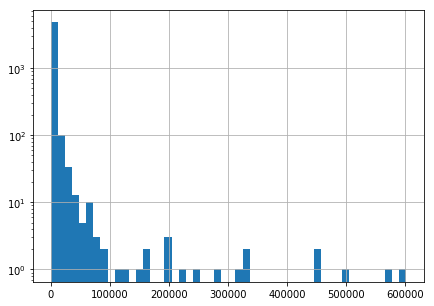

In [4]:
df['b/s'].hist(figsize=(7,5), bins=50)
plt.yscale('log')

# 数量データの標準化
StandardScalerのfit_transform関数には引数が2次元でなければいけないので今回は下記関数を利用して標準化を行う

In [5]:
def calc_zscore(x):
    '''
    関数内容
    　・z-score(元データを平均0、標準偏差を1に変換)を算出する関数
    Input
    　・x：数値データ
    Return
      ・z-score
    関数使い方
      ・df['norm_b/s'] = calc_zscore(df['b/s'].values)
    
    '''
    
    x_mean = x.mean()# 平均
    x_std  = np.std(x)# 標準偏差

    zscore = (x - x_mean) / x_std
    
    return zscore

In [6]:
# 単に標準化すると値がマイナスになるものもあるので便宜上1を加えている
df['norm_b/s'] = calc_zscore(df['b/s'].values) + 1

df.head()

,b,s,b/s,norm_b/s
0,444429,384,1157.0,0.887041
1,1471096,721,2040.0,0.928978
2,1344458,1625,827.0,0.871368
3,439601,707,622.0,0.861632
4,51275,790,65.0,0.835178


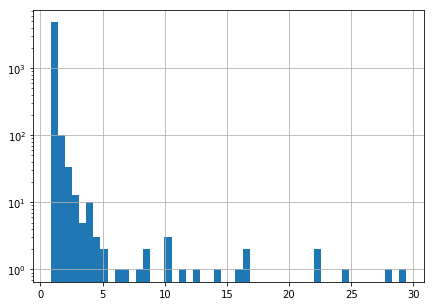

In [7]:
df['norm_b/s'].hist(figsize=(7,5), bins=50)
plt.yscale('log')

参考URL：https://www.st-hakky-blog.com/entry/2017/12/11/200046